In [1]:
import pandas as pd
import spacy
# nlp = spacy.load("nl_core_news_sm")
nlp = spacy.load("nl_core_news_lg")
from tqdm.notebook import tqdm
from wordfreq import word_frequency, top_n_list
from pprint import pprint

# Load Data

In [4]:
CONFERENCES_CORPUS_PATH = '../output/CONFERENCES_corpus_without_stopwords.csv'
NOS_CORPUS_PATH = '../output/NOS_corpus_5000_articles_without_stopwords.csv'

In [15]:
CONFERENCES_CORPUS_DF = pd.read_csv(CONFERENCES_CORPUS_PATH)
CONFERENCES_CORPUS_DF.set_index('word', inplace=True)

NOS_CORPUS_DF = pd.read_csv(NOS_CORPUS_PATH)
NOS_CORPUS_DF.set_index('word', inplace=True)

In [19]:
print(f'{len(CONFERENCES_CORPUS_DF.columns)} Conferences were taken into account.')

60 Conferences were taken into account.


In [156]:
def process_frequency_list(text, include_stopwords):
    return [token.lemma_ for token in nlp(text) if ((not include_stopwords and not token.is_stop) or not token.is_punct or not token.is_space)]


def percentage_of_basic_words(corpus, nr_of_words, include_stopwords=False):
    if not isinstance(nr_of_words, list):
        nr_of_words = list(nr_of_words)
   
    freqworddict = {str(k): [] for k in nr_of_words}

    for number in freqworddict.keys():
        freqworddict[number] = process_frequency_list(' '.join(top_n_list('nl', int(number)+400)), include_stopwords)[:int(number)]
        print(len(freqworddict[number]))
        
    conferenceworddict = {k: {} for k in corpus.columns}
    for column in tqdm(corpus.columns, total=len(corpus.columns)):
            conference_words = corpus.loc[:, column]
            conferenceworddict[column]['totalwords'] = int(conference_words.sum())
            for number in freqworddict:
                topbasicwords = f'top{number}basicwords'
                conferenceworddict[column][topbasicwords] = 0 

                for word, count in conference_words.iteritems():
                        if word in freqworddict[number]:
                            conferenceworddict[column][topbasicwords] += count
            conferenceworddict[column][topbasicwords] = int(conferenceworddict[column][topbasicwords])
    
    nested_keys = conferenceworddict[list(conferenceworddict.keys())[0]].keys()
    topbasicwordkeys = [key for key in nested_keys if 'basicwords' in key]

    basic_words_matrix = [topbasicwordkeys]

    for document in conferenceworddict:
        inner_list = []
        for key in topbasicwordkeys:
            conferenceworddict[document][f'percentage_{key}'] = float(format(round(conferenceworddict[document][key] / conferenceworddict[document]['totalwords'], 2), '.2f'))
            inner_list.append(conferenceworddict[document][f'percentage_{key}'])
        basic_words_matrix.append(inner_list)
    
    return basic_words_matrix

In [207]:
nr_of_words = [300, 600, 900, 1200, 1500, 1800, 2100]

In [208]:
conferences_basic_words = percentage_of_basic_words(CONFERENCES_CORPUS_DF, nr_of_words=nr_of_words, include_stopwords=False)

300
600
900
1200
1500
1800
2100


  0%|          | 0/60 [00:00<?, ?it/s]

In [167]:
nos_basic_words = percentage_of_basic_words(NOS_CORPUS_DF, nr_of_words=nr_of_words, include_stopwords=False)

1250


  0%|          | 0/1 [00:00<?, ?it/s]

## Average Percentage of Basic Words of All Conferences

In [213]:
def average_percentage(basic_words):
    flattened_list = [item for sublist in basic_words for item in sublist]
    return round(sum(flattened_list[1:])/len(flattened_list[1:]), 2)


average_conferences_basic_words = average_percentage(conferences_basic_words)
average_conferences_basic_words

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [253]:
average_nos_basic_words = average_percentage(nos_basic_words)
average_nos_basic_words

0.45

Text(1, 0.45, '0.45')

<Figure size 432x288 with 0 Axes>

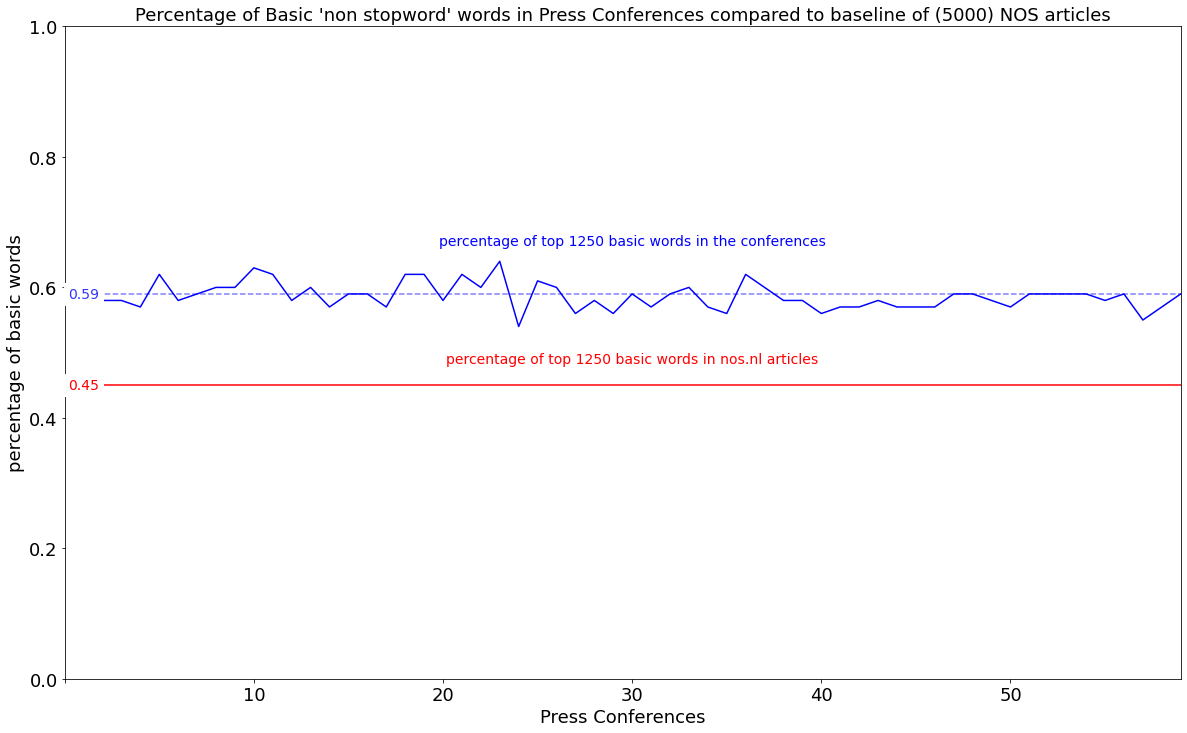

In [206]:
from matplotlib import pyplot as plt
plt.figure()
plt.rcParams.update({'font.size': 18}) # must set in top
conferences_data = pd.DataFrame(data=conferences_basic_words[1:], columns=conferences_basic_words[0])
# df2 = pd.DataFrame(data=l[1:], columns=l[0])
nos_data = pd.DataFrame(data=nos_basic_words[1:], columns=nos_basic_words[0])
#lines = df2.plot.line()

basic_words_figure = conferences_data.plot.line(figsize=(20,12), color='blue')
#a = conferences_data.plot.bar(figsize=(6,9))
basic_words_figure.set_ylim(0, 1)
basic_words_figure.set_xlim(0, 59)
# a.set_xlabel('Press Conferences')
basic_words_figure.set_title("Percentage of Basic 'non stopword' words in Press Conferences compared to baseline of (5000) NOS articles", fontsize=18)
basic_words_figure.get_legend().remove()
basic_words_figure.set_ylabel('percentage of basic words')
basic_words_figure.set_xlabel("Press Conferences") # dataset of 'nos.nl' Articles
basic_words_figure.xaxis.get_major_ticks()[0].label1.set_visible(False)
basic_words_figure.axhline(y=average_conferences_basic_words, xmin=0, xmax=60, color='blue', linestyle='--', alpha=0.5)
basic_words_figure.axhline(y=nos_data.iloc[0, 0], xmin=0, xmax=60, color='red')
basic_words_figure.text(30, 0.67, 'percentage of top 1250 basic words in the conferences', fontsize=14, va='center', ha='center', backgroundcolor='w', color='blue')
basic_words_figure.text(1, average_conferences_basic_words, f'{average_conferences_basic_words}', fontsize=14, va='center', ha='center', backgroundcolor='w', color='blue', alpha=0.8)
basic_words_figure.text(30, 0.49, 'percentage of top 1250 basic words in nos.nl articles', fontsize=14, va='center', ha='center', backgroundcolor='w', color='red')
basic_words_figure.text(1, 0.45, '0.45',  fontsize=14, va='center', ha='center', backgroundcolor='w', color='red')

In [216]:
conferences_data

,top300basicwords,top600basicwords,top900basicwords,top1200basicwords,top1500basicwords,top1800basicwords,top2100basicwords
0,0.30,0.43,0.52,0.57,0.62,0.65,0.69
1,0.33,0.46,0.53,0.58,0.66,0.70,0.72
2,0.32,0.46,0.52,0.57,0.65,0.67,0.70
3,0.32,0.44,0.53,0.57,0.64,0.67,0.70
4,0.32,0.45,0.51,0.57,0.63,0.66,0.69
5,0.34,0.46,0.57,0.61,0.66,0.69,0.72
6,0.31,0.42,0.50,0.57,0.65,0.68,0.70
7,0.33,0.46,0.54,0.59,0.65,0.70,0.72
8,0.32,0.44,0.54,0.59,0.64,0.68,0.70
9,0.32,0.45,0.54,0.59,0.63,0.66,0.69


In [227]:
list(conferences_data['top300basicwords'])

[0.3,
 0.33,
 0.32,
 0.32,
 0.32,
 0.34,
 0.31,
 0.33,
 0.32,
 0.32,
 0.35,
 0.33,
 0.32,
 0.31,
 0.3,
 0.32,
 0.32,
 0.32,
 0.36,
 0.36,
 0.31,
 0.33,
 0.34,
 0.35,
 0.28,
 0.29,
 0.35,
 0.3,
 0.33,
 0.31,
 0.33,
 0.31,
 0.32,
 0.33,
 0.32,
 0.32,
 0.37,
 0.32,
 0.33,
 0.31,
 0.3,
 0.31,
 0.3,
 0.33,
 0.32,
 0.3,
 0.3,
 0.33,
 0.32,
 0.32,
 0.32,
 0.33,
 0.32,
 0.32,
 0.34,
 0.32,
 0.34,
 0.29,
 0.32,
 0.3]

<Figure size 432x288 with 0 Axes>

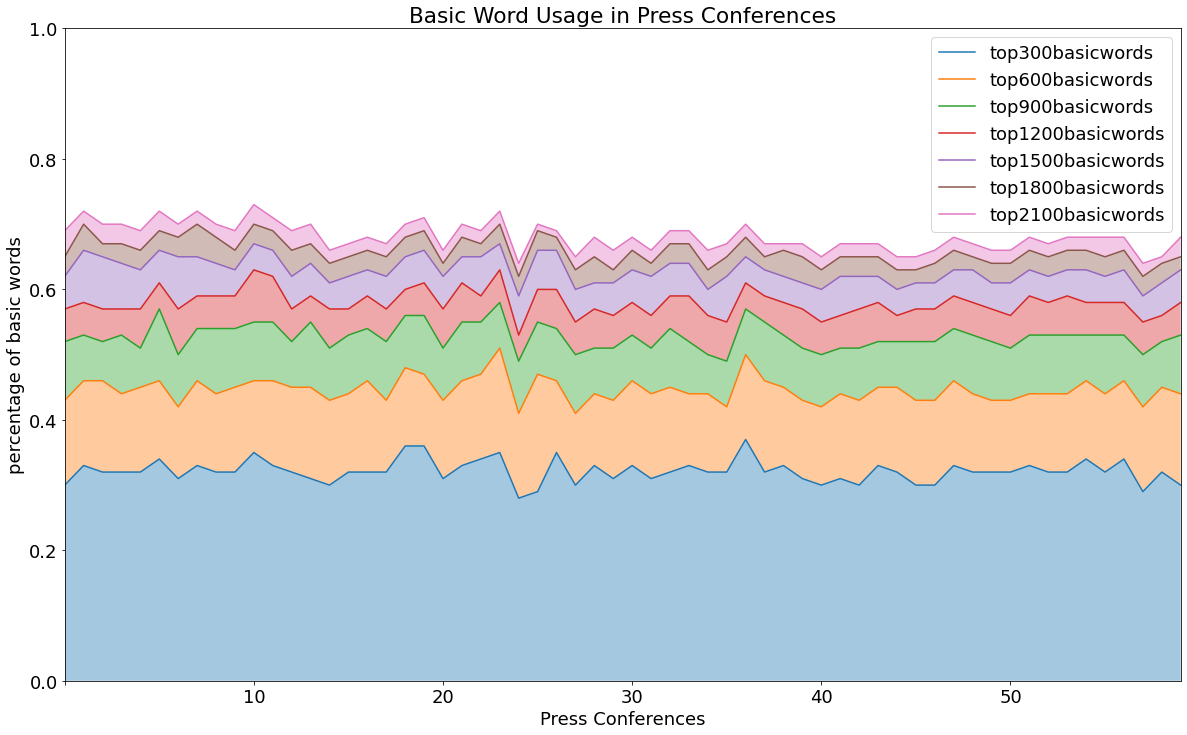

In [252]:
import numpy as np
from matplotlib import pyplot as plt
plt.figure()
plt.rcParams.update({'font.size': 18}) # must set in top
conferences_data = pd.DataFrame(data=conferences_basic_words[1:], columns=conferences_basic_words[0])

#nos_data = pd.DataFrame(data=nos_basic_words[1:], columns=nos_basic_words[0])
x = np.arange(60)
basic_words_figure = conferences_data.plot.line(figsize=(20,12))
basic_words_figure.set_ylim(0, 1)
basic_words_figure.set_xlim(0, 59)
basic_words_figure.set_title('Basic Word Usage in Press Conferences')
basic_words_figure.set_ylabel('percentage of basic words')
basic_words_figure.set_xlabel("Press Conferences") # dataset of 'nos.nl' Articles
basic_words_figure.xaxis.get_major_ticks()[0].label1.set_visible(False)
for index in range(len(conferences_data.columns)):
    if index == 0:
        plt.fill_between(x, 0, list(conferences_data[conferences_data.columns[index]]), alpha=0.4)
    else:
        plt.fill_between(x, list(conferences_data[conferences_data.columns[index-1]]), list(conferences_data[conferences_data.columns[index]]), alpha=0.4)

#basic_words_figure.axhline(y=average_conferences_basic_words, xmin=0, xmax=60, color='blue', linestyle='--', alpha=0.5)
# basic_words_figure.axhline(y=nos_data.iloc[0, 0], xmin=0, xmax=60, color='red')
# basic_words_figure.text(30, 0.67, 'percentage of top 1300 basic words in the conferences', fontsize=14, va='center', ha='center', backgroundcolor='w', color='blue')
# basic_words_figure.text(30, 0.49, 'percentage of top 1300 basic words in nos.nl articles', fontsize=14, va='center', ha='center', backgroundcolor='w', color='red')

In [20]:
urls = pd.Series(urls)
urls = urls[urls.str.contains('/artikel/')]

In [23]:
urls.iloc[27]

'/artikel/2332717-politiemol-mark-m-krijgt-ook-in-hoger-beroep-vijf-jaar-cel'

In [26]:
from datetime import datetime

datelist = pd.date_range('01/04/2020', periods=100).tolist()

In [30]:
datetime.today().strftime('%d-%m-%Y')

'26-01-2022'

In [113]:
import pandas as pd
from bs4 import BeautifulSoup
import pathlib
import requests
from tqdm.notebook import tqdm
import os

pd.set_option('display.max_rows', None)

In [135]:
# https://nos.nl/nieuws/archief/2020-05-25

ARTICLE_OUTPUT_FOLDER = '../input/articles'
NOS_ARCHIVE_URL = 'https://nos.nl/nieuws/archief/'
NOS_URL = 'https://nos.nl'

In [68]:
dates = [x.strftime('%Y-%m-%d') for x in pd.date_range(start = '2020-04-01',end='2020-04-30', freq='D')] # datetime.today()
dates

['2020-04-01',
 '2020-04-02',
 '2020-04-03',
 '2020-04-04',
 '2020-04-05',
 '2020-04-06',
 '2020-04-07',
 '2020-04-08',
 '2020-04-09',
 '2020-04-10',
 '2020-04-11',
 '2020-04-12',
 '2020-04-13',
 '2020-04-14',
 '2020-04-15',
 '2020-04-16',
 '2020-04-17',
 '2020-04-18',
 '2020-04-19',
 '2020-04-20',
 '2020-04-21',
 '2020-04-22',
 '2020-04-23',
 '2020-04-24',
 '2020-04-25',
 '2020-04-26',
 '2020-04-27',
 '2020-04-28',
 '2020-04-29',
 '2020-04-30']

In [ ]:
def get_article_urls(dates):
    article_urls_dict = {}
    
    for date in tqdm(dates, total=len(dates)):
        urls = []
        response = requests.get(NOS_ARCHIVE_URL+date)
        soup = BeautifulSoup(response.content, "html.parser")
        
        for page_content in soup.findAll('a', href=True):
                urls.append(page_content['href'])
        urls = pd.Series(urls)
        urls = urls[urls.str.contains('/artikel/')]
        urls = NOS_URL + urls
        article_urls_dict[date] = list(urls)
        
    return(article_urls_dict)

article_urls = get_article_urls(dates)

In [144]:
def get_article_text(article_url, date):
    file_name = f"{ARTICLE_OUTPUT_FOLDER}/{date}/{article_url[article_url.find('/artikel/')+9:]}"
    
    if not os.path.exists(file_name):
        response_text = requests.get(article_url)
        soup = BeautifulSoup(response_text.content, "html.parser")
        raw_paragraphs = soup.find_all('p', class_="text_3v_J6Y0G")
        texts = [p.get_text() for p in raw_paragraphs]

        with open(file_name, "w", encoding='utf-8') as txt_file:
            txt_file.write('\n'.join(texts))

pathlib.Path(ARTICLE_OUTPUT_FOLDER).mkdir(parents=True, exist_ok=True)

i = 0
for date in tqdm(article_urls, total=len(article_urls)):
    pathlib.Path(ARTICLE_OUTPUT_FOLDER + '/' + date).mkdir(parents=True, exist_ok=True)
    for article_url in tqdm(article_urls[date]):
        get_article_text(article_url, date)
    i += 1
    if i == 1000:
        break

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

In [147]:
file_count = sum(len(files) for _, _, files in os.walk('../input/articles/'))
print(file_count)

1029
